In [13]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!


In [2]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure3'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)

'/mnt/home/szheng/ceph/place_variability/data/paper'

In [14]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False).iloc[:10]
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
reload(sdos)
import get_all_switch_add_metrics as gasam
reload(gasam)

import preprocess_one_session as prepos

In [18]:
sys.path

['/mnt/home/szheng/projects/place_variability/jupyter',
 '/mnt/home/szheng/ceph/envs/jax/lib/python39.zip',
 '/mnt/home/szheng/ceph/envs/jax/lib/python3.9',
 '/mnt/home/szheng/ceph/envs/jax/lib/python3.9/lib-dynload',
 '',
 '/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages',
 '/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/fast_soft_sort-0.1-py3.9.egg',
 '/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/pykalman-0.9.5-py3.9.egg',
 '/mnt/home/szheng/projects/tca/tensortools',
 '/mnt/ceph/users/szheng/envs/jax/lib/python3.9/site-packages',
 '/mnt/home/szheng/projects/seq_detection2/code',
 '/mnt/home/szheng/projects/util_code',
 '/mnt/home/szheng/projects/nmf_analysis',
 '/mnt/home/szheng/projects/nmf_analysis/scripts',
 '/mnt/home/szheng/projects/cluster_spikes',
 '/mnt/home/szheng/projects/place_variability/code',
 '/mnt/home/szheng/projects/util_code',
 '/mnt/home/szheng/projects/seq_detection2/code',
 '/mnt/home/szheng/projects/util_code',
 '/mnt/home/

In [50]:
# testing the combined function
import co_sw_and_ripple_cofiring_one_sess as csarcos
reload(csarcos)

<module 'co_sw_and_ripple_cofiring_one_sess' from '/mnt/home/szheng/projects/place_variability/code/co_sw_and_ripple_cofiring_one_sess.py'>

In [54]:
!python ../code/co_sw_and_ripple_cofiring_one_sess.py 0 1

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
67 sessions!
0
True
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/shuffle_all_sw_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/projects/place_variability/jupyter/../code/co_sw_and_ripple_cofiring_one_sess.py:138: PerformanceWarning: indexing past lexsort depth may impact performance.
  label_sim_one 

In [51]:
row = subdb.iloc[0]
task_index=0
data_dir_full=ddf = row['data_dir_full']
csarcos.main(data_dir_full, test_mode=True)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/shuffle_all_sw_afterheadscan_fr_mean.p exists; loading---


/mnt/home/szheng/projects/place_variability/code/co_sw_and_ripple_cofiring_one_sess.py:137: PerformanceWarning: indexing past lexsort depth may impact performance.
  label_sim_one = ripple_sim_d.loc['ripple_only','count_in_interval',epoch]
/mnt/home/szheng/projects/place_variability/code/co_sw_and_ripple_cofiring_one_sess.py:137: PerformanceWarning: indexing past lexsort depth may impact performance.
  label_sim_one = ripple_sim_d.loc['ripple_only','count_in_interval',epoch]


In [6]:
%%time
all_fields_recombined_all = {}
pf_params_recombined_all = {}
fr_map_trial_df_all = {}
pval_all = {}
best_n_all = {}
X_pwc_all = {}
X_raw_all = {}
changes_df_all = {}
var_res_all = {}
corr_all = {}
all_sw_d_all = {}
all_sw_with_metrics_d_all = {}
trial_index_to_index_within_df_all = {}

spk_beh_df_all = {}

for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    
    res=dpp.load_spk_beh_df(data_dir_full,load_only=True)
    if res is not None:
        spk_beh_df = res['spk_beh_df']
        spk_beh_df,_ = dpp.add_lin_binned(spk_beh_df,bin_size=2.2,nbins=None)
        spk_beh_df_all[ani,sess] = spk_beh_df
        trial_index_to_index_within_df = dpp.trial_index_to_index_within_trialtype(spk_beh_df)
        trial_index_to_index_within_df_all[ani,sess] = trial_index_to_index_within_df
        

    pf_res_recombine = pfrc.main(data_dir_full,force_reload=False,load_only=True)

    all_fields_recombined=pf_res_recombine['all_fields_recombined']
    all_fields_recombined_all[ani,sess] = all_fields_recombined
    pf_params_recombined = pf_res_recombine['params_recombined']
    pf_params_recombined_all[ani,sess] = pf_params_recombined

    fr_map_all = fmos.main(data_dir_full,force_reload=False,load_only=True)
    fr_map_trial_df = fr_map_all['fr_map_trial_df']
    fr_map_trial_df_all[ani,sess] = fr_map_trial_df



    sw_res = sdos.main(data_dir_full,force_reload=False,load_only=True)
    pval = sw_res['pval']
    pval_all[ani,sess]=pval
    best_n = sw_res['best_n']
    best_n_all[ani,sess] = best_n
    X_pwc = sw_res['X_pwc']
    X_pwc_all[ani,sess] = X_pwc
    X_raw = sw_res['X_raw']
    X_raw_all[ani,sess]=X_raw
    changes_df = sw_res['changes_df']
    changes_df_all[ani,sess] = changes_df
    var_res = sw_res['var_res']
    var_res_all[ani,sess]=var_res
    corr = sw_res['corr']
    corr_all[ani,sess] = corr

    sw_info_res=gasam.main(data_dir_full,force_reload=False,load_only=True)
    if sw_info_res is None:
        sw_info_res=gasam.main(data_dir_full,force_reload=True,load_only=False)
    all_sw_d = sw_info_res['all_sw_d']
    all_sw_d_all[ani,sess] = all_sw_d
    all_sw_with_metrics_d = sw_info_res['all_sw_with_metrics_d']
    all_sw_with_metrics_d_all[ani,sess] = all_sw_with_metrics_d

all_fields_recombined_all = pd.concat(all_fields_recombined_all,axis=0)
pf_params_recombined_all = pd.concat(pf_params_recombined_all,axis=0)
fr_map_trial_df_all = pd.concat(fr_map_trial_df_all,axis=0)
pval_all = pd.concat(pval_all,axis=0)
X_pwc_all = pd.concat(X_pwc_all,axis=0)
X_raw_all = pd.concat(X_raw_all,axis=0)
changes_df_all = pd.concat(changes_df_all,axis=0)
var_res_all = pd.concat(var_res_all,axis=0)
corr_all = pd.concat(corr_all,axis=0)
all_sw_d_all = pd.concat(all_sw_d_all,axis=0)
all_sw_with_metrics_d_all = pd.concat(all_sw_with_metrics_d_all,axis=0)
best_n_all = pd.concat(best_n_all,axis=0)

spk_beh_df_all = pd.concat(spk_beh_df_all,axis=0)


/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/fr_map.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/sw_res_afterheadscan_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/all_sw_info_fr_mean.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_d

In [4]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

In [5]:
all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all = prepped_data_agg['var_res_all']
corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']


# function to get co-sw within 1,2,3 trials, using absolute trial indices

In [11]:
import pairwise_analysis as pwa
reload(pwa)
import switch_metrics as sm
reload(sm)
import test_co_switch as tcs
reload(tcs)
import shuffle_changes_df_one_session as scdos

In [29]:
row = subdb.iloc[0]
task_index=0
data_dir_full=ddf = row['data_dir_full']
ani=row['animal_name.1']
sess = row['sess_name']
# ani,sess,task_index = 'e13_26m1','e13_26m1_210913',0
changes_df_one = changes_df_all.loc[ani,sess,task_index]
all_sw_d_one = all_sw_d_all.loc[ani,sess,task_index]
pf_params_recombined_one=pf_params_recombined_all.loc[ani,sess]
# changes_df_one = changes_df_all.loc[ani,sess]
spk_beh_df = spk_beh_df_all.loc[ani,sess]

NameError: name 'changes_df_all' is not defined

In [56]:
reload(sdos)
reload(tcs)
reload(scdos)
shuffle_all_sw_one=scdos.main(ddf,test_mode=False,dosave=False,force_reload=False,load_only=True)

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/shuffle_all_sw_afterheadscan_fr_mean.p exists; loading---


In [61]:
allsw

trialtype  uid  field_index          time  speed_gauss  field_pos  \
0 0        both   86            1   6921.829600    35.105419       21.0   
  1        both   91            0   6922.663133    15.521699       29.0   
  2        both   74            0   6970.108500    27.571791       21.0   
  3        both  227            0   6970.541933    19.994472       28.0   
  4         0.0   50            2   7097.590867    15.831902       98.0   
...         ...  ...          ...           ...          ...        ...   
1 181       1.0  107            1  22582.669633    13.728125       62.0   
  182       1.0  202            0  22567.940858    27.721392       33.0   
  183      both   46            0  22601.074367    15.593179        3.0   
  184      both   93            0  22604.375200    12.417822       20.0   
  185      both  238            0  22603.841733     4.547164       19.0   

       trial_index  switch  index_within  switch_trial  switch_trial_frac  \
0 0              2     1.0             1           2.0           0.064516   
  1              2     1.0             1           2.0           0.064516   
  2              3     1.0             1           3.0           0.096774   
  3              3    -1.0             1           3.0           0.096774   
  4              4     1.0             2           2.0           0.105263   
...            ...     ...           ...           ...                ...   
1 181           29    -1.0            11          11.0           0.846154   
  182           29     1.0            11          11.0           0.846154   
  183           30    -1.0            18          30.0           0.937500   
  184           30     1.0            18          30.0           0.937500   
  185           30     1.0            18          30.0           0.937500   

       pre_ntrials_in_segment  post_ntrials_in_segment  
0 0                         2                        7  
  1                         2                       27  
  2                         3                       26  
  3                         3                       26  
  4                         2                       17  
...                       ...                      ...  
1 181                       2                        2  
  182                       3                        2  
  183                       2                        2  
  184                      23                        2  
  185                       4                        2  

[368 rows x 13 columns]

In [62]:
%%time
sw_sim_allonoff_shuffle = []
diff_key = 'trial_index'#'time'#
win_l = [0,1,2]#[1,30]#[0,1,2]
sw_sim_allonoff,time_diff = pwa.get_sw_sim(all_sw_d_one,diff_key=diff_key,win_l=win_l,decay_rate_l=[])

for ii,allsw in enumerate(shuffle_all_sw_one[:1000]):
    ss, td=pwa.get_sw_sim(allsw.loc[task_index],diff_key=diff_key,win_l=win_l,decay_rate_l=[])
#     sw_sim_allonoff_shuffle[ii]=sw_sim_allonoff
    sw_sim_allonoff_shuffle.append(ss)


CPU times: user 39.8 s, sys: 352 ms, total: 40.1 s
Wall time: 40.1 s


In [108]:
# reload(tcs)
# all_sw_shuffle =tcs.gen_circular_shuffle_trialtype_seperated_get_all_sw(changes_df_one,pf_params_recombined_one,spk_beh_df,nrepeats=200)



In [58]:
# generic preoprocess
mat_to_return=prep.load_stuff(data_dir_full)
# sessionPulses=mat_to_return['sessionPulses']
# filtered = mat_to_return['filtered']
# behavior=mat_to_return['behavior']
ripples = mat_to_return['ripples']
cell_metrics=mat_to_return['cell_metrics']
mergepoints = mat_to_return['mergepoints']

res_all_epochs_d, ripple_time_ints_epochs_d = prep.get_spike_count_rate_participation_in_ripple_all(cell_metrics,
                                                                                                    ripples,
                                                                                                    mergepoints,
                                                                                                   )


In [59]:
%%time
import pairwise_analysis as pwa
reload(pwa)
ripple_sim_d = pwa.get_all_ripple_pairwise_sim(cell_metrics,ripples,mergepoints)

CPU times: user 24.5 s, sys: 140 ms, total: 24.6 s
Wall time: 24.6 s


In [54]:
data_dir_full

'/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119'

/tmp/ipykernel_883672/1366712426.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  label_sim_one = ripple_sim_d.loc['ripple_only',rip_sim_key,epoch]


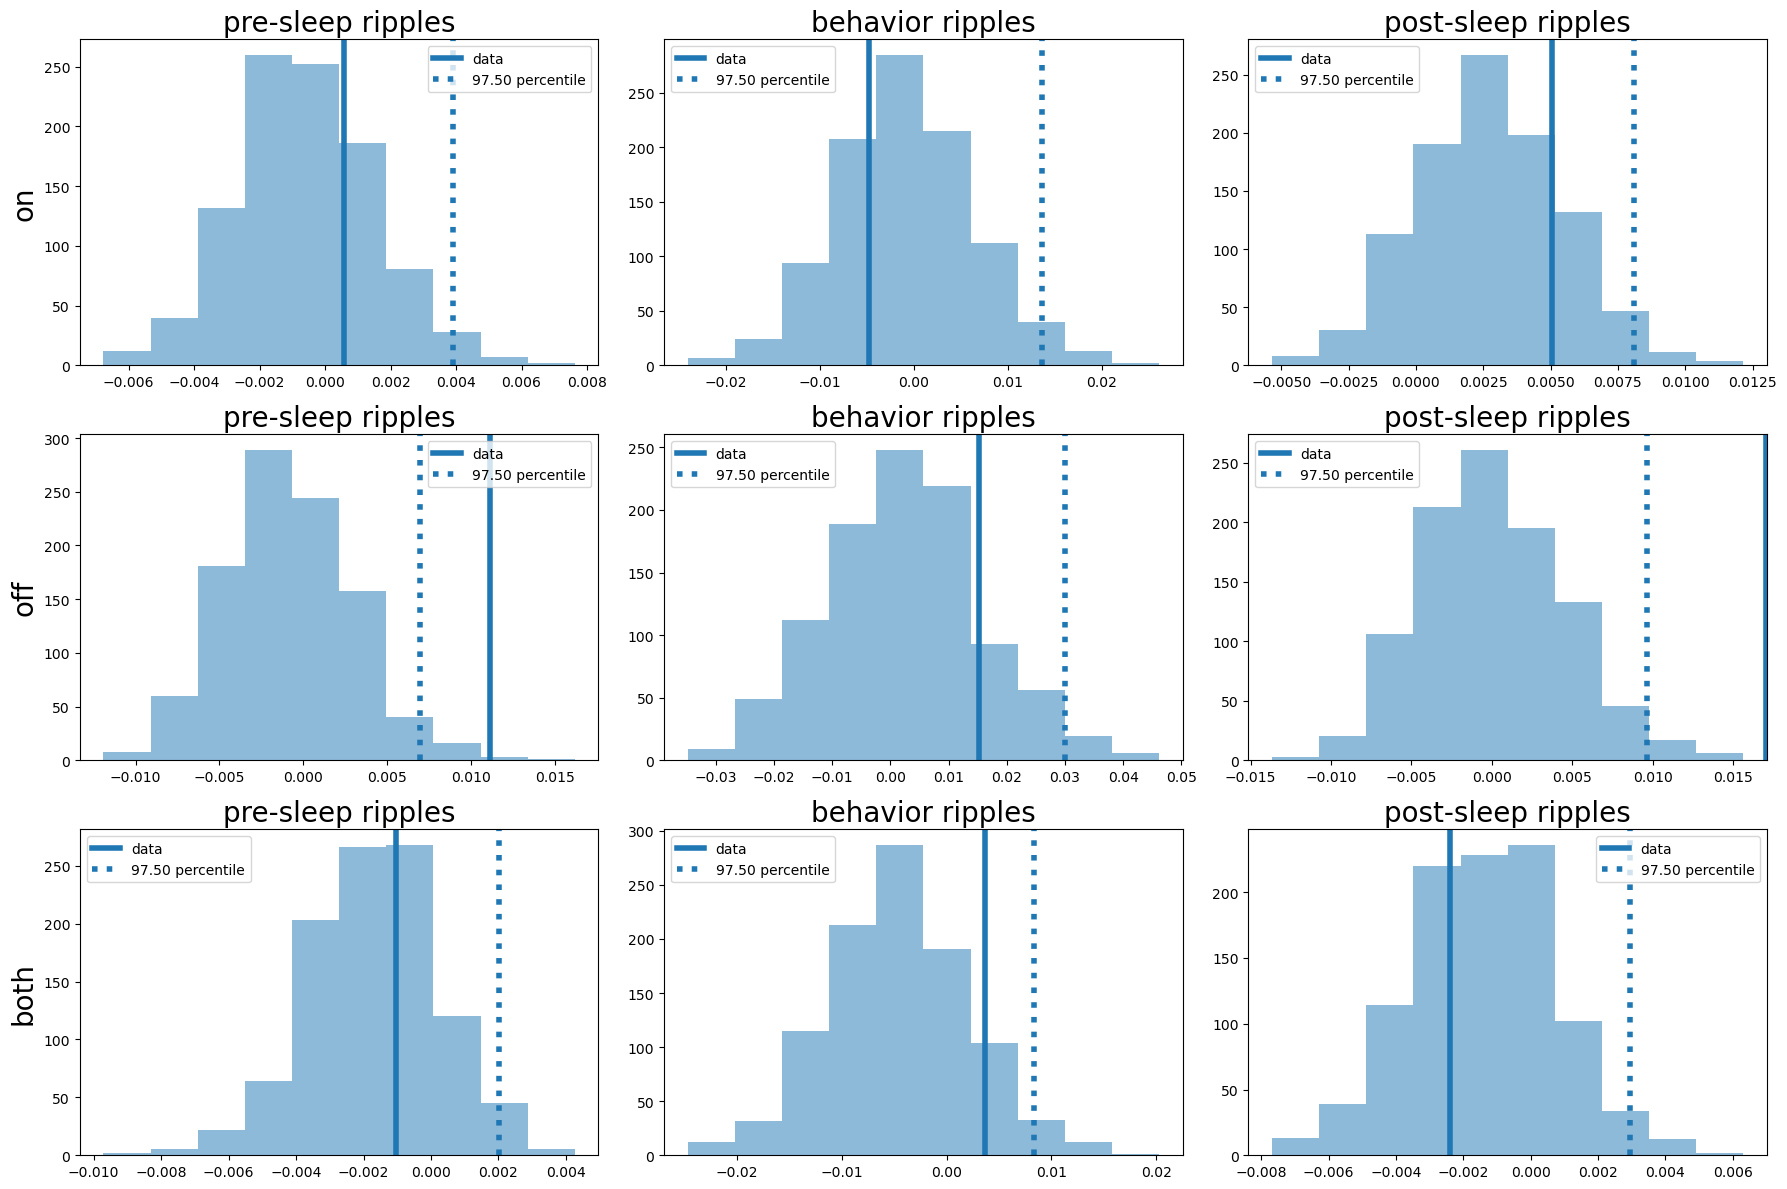

In [63]:

onoff_str_d = {1:'on',-1:'off','both':'both'}
sw_key='within_1'#'within_30'#'within_1'#'within_30'#'within_0'
rip_sim_key = 'count_in_interval'#'participation_in_interval'

fig,axs = plt.subplots(3,3,figsize=(6*3,4*3))
for ii,onoff in enumerate([1,-1,'both']):
    onoff_str=onoff_str_d[onoff]
    epoch_name = ['pre-sleep ripples','behavior ripples','post-sleep ripples']
    for jj,epoch in enumerate([0,1,2]):
        label_sim_one = ripple_sim_d.loc['ripple_only',rip_sim_key,epoch]
        co_sw_sim_one = sw_sim_allonoff.loc[onoff,sw_key]
    
        ax=axs[ii,jj]
        diff_data,diff_data_sh_l,pval,fig,ax=pwa.shuffle_test_label_switch_diff_plot(label_sim_one,co_sw_sim_one,sw_sim_allonoff_shuffle,onoff=onoff,sw_key=sw_key,
                                            fig=fig,ax=ax,doplot=True
                                           )
        title = epoch_name[jj]
        ax.set_title(title)
        if jj==0:
            ax.set_ylabel(onoff_str)
plt.tight_layout()


In [44]:
all_sw_d_one

,trialtype,uid,field_index,time,speed_gauss,field_pos,trial_index,switch,index_within,switch_trial,switch_trial_frac,pre_ntrials_in_segment,post_ntrials_in_segment
0,both,54,1,5722.376002,37.562200,26.173729,2,1.0,1,2.0,0.080000,2,12
1,both,315,0,5722.369617,37.808263,26.077983,2,1.0,1,2.0,0.080000,2,23
2,both,65,1,5759.693554,20.814197,23.863252,3,-1.0,1,3.0,0.120000,3,22
3,both,71,0,5758.741156,31.873849,13.012589,3,1.0,1,3.0,0.120000,3,7
4,both,174,0,5753.489358,12.868772,1.316958,3,1.0,1,3.0,0.120000,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0.0,275,0,7358.524858,8.415675,79.474288,23,-1.0,13,13.0,0.866667,2,2
162,0.0,315,1,7308.976848,2.474130,49.979202,23,1.0,13,13.0,0.866667,13,2
163,0.0,325,0,7301.460144,14.864652,9.779967,23,-1.0,13,13.0,0.866667,3,2
164,0.0,327,0,7305.637308,15.840881,41.807206,23,-1.0,13,13.0,0.866667,10,2


In [50]:
sw_sim_allonoff.loc[1]

3.0    29.0   35.0   36.0   37.0   38.0   39.0   40.0   \
1    within_0 3.0      1.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
              29.0     0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
              35.0     1.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
              36.0     0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
              37.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
both within_2 459.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
              475.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    1.0   
              476.0    0.0    1.0    1.0    0.0    1.0    0.0    0.0    1.0   
              479.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
              480.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0   

                     43.0   45.0   ...  374.0  375.0  383.0  392.0  408.0  \
1    within_0 3.0      0.0    0.0  ...    NaN    NaN    NaN    NaN    NaN   
              29.0     0.0    0.0  ...    NaN    NaN    NaN    NaN    NaN   
              35.0     0.0    0.0  ...    NaN    NaN    NaN    NaN    NaN   
              36.0     0.0    0.0  ...    NaN    NaN    NaN    NaN    NaN   
              37.0     0.0    0.0  ...    NaN    NaN    NaN    NaN    NaN   
...                    ...    ...  ...    ...    ...    ...    ...    ...   
both within_2 459.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
              475.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
              476.0    1.0    0.0  ...    1.0    0.0    1.0    0.0    1.0   
              479.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   
              480.0    1.0    0.0  ...    0.0    0.0    0.0    0.0    0.0   

                     427.0  439.0  442.0  451.0  475.0  
1    within_0 3.0      NaN    NaN    NaN    NaN    NaN  
              29.0     NaN    NaN    NaN    NaN    NaN  
              35.0     NaN    NaN    NaN    NaN    NaN  
              36.0     NaN    NaN    NaN    NaN    NaN  
              37.0     NaN    NaN    NaN    NaN    NaN  
...                    ...    ...    ...    ...    ...  
both within_2 459.0    0.0    1.0    0.0    0.0    1.0  
              475.0    0.0    0.0    0.0    0.0    0.0  
              476.0    1.0    0.0    0.0    0.0    0.0  
              479.0    0.0    0.0    0.0    0.0    0.0  
              480.0    0.0    0.0    0.0    0.0    0.0  

[1542 rows x 209 columns]

In [49]:
sw_sim_allonoff_shuffle[0].loc[onoff,'within_0']

,32.0,35.0,38.0,42.0,55.0,60.0,61.0,66.0,67.0,68.0,...,78.0,132.0,143.0,219.0,257.0,270.0,333.0,359.0,360.0,376.0
32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
375.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
